In [28]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd

In [30]:
# Chargement des données
data = pd.read_csv('credit_card_fraud_corr.csv', sep=';', index_col='transactionId')

In [31]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
transactionId,,,,,,,,,,
0,1,PAYMENT,"9839,64",C1231006815,170136,"160296,36",M1979787155,0,0,0
1,1,PAYMENT,"1864,28",C1666544295,21249,"19384,72",M2044282225,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1
4,1,PAYMENT,"11668,14",C2048537720,41554,"29885,86",M1230701703,0,0,0


In [33]:
from sklearn.metrics import adjusted_rand_score

In [34]:
# Séparation des caractéristiques (X) et de la variable cible (y)
X = data.drop('isFraud', axis='columns')  # Assurez-vous de remplacer 'IsFraud' par le nom correct de votre variable cible
y = data['isFraud']

In [35]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
transactionId,,,,,,,,,,
0,1,PAYMENT,"9839,64",C1231006815,170136,"160296,36",M1979787155,0,0,0
1,1,PAYMENT,"1864,28",C1666544295,21249,"19384,72",M2044282225,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1
4,1,PAYMENT,"11668,14",C2048537720,41554,"29885,86",M1230701703,0,0,0


In [41]:
# Calcul des moyennes et des écarts types
mean_values = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].mean()
std_values = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].std()

# Standardisation
data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = (data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] - mean_values) / std_values

print(data.head())  # Affiche les premières lignes du DataFrame après standardisation


               step  type    amount     nameOrig  oldbalanceOrg  \
transactionId                                                     
0                 1     4 -0.453657  11231006815      -0.239031   
1                 1     4 -0.476184  11666544295      -0.288711   
2                 1     5 -0.480939  11305486145      -0.295741   
3                 1     2 -0.480939   1840083671      -0.295741   
4                 1     4 -0.448492  12048537720      -0.281936   

               newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
transactionId                                                                
0                   -0.243353  21979787155       -0.424315       -0.461442   
1                   -0.289983  22044282225       -0.424315       -0.461442   
2                   -0.296398   1553264065       -0.424315       -0.461442   
3                   -0.296398    138997010       -0.415171       -0.461442   
4                   -0.286508  21230701703       -0.424315    

In [42]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
transactionId,,,,,,,,,,
0,1,4,-0.453657,11231006815,-0.239031,-0.243353,21979787155,-0.424315,-0.461442,0
1,1,4,-0.476184,11666544295,-0.288711,-0.289983,22044282225,-0.424315,-0.461442,0
2,1,5,-0.480939,11305486145,-0.295741,-0.296398,1553264065,-0.424315,-0.461442,1
3,1,2,-0.480939,1840083671,-0.295741,-0.296398,138997010,-0.415171,-0.461442,1
4,1,4,-0.448492,12048537720,-0.281936,-0.286508,21230701703,-0.424315,-0.461442,0


In [43]:
df = data.drop('isFraud', axis='columns')  

In [44]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
transactionId,,,,,,,,,
0,1,4,-0.453657,11231006815,-0.239031,-0.243353,21979787155,-0.424315,-0.461442
1,1,4,-0.476184,11666544295,-0.288711,-0.289983,22044282225,-0.424315,-0.461442
2,1,5,-0.480939,11305486145,-0.295741,-0.296398,1553264065,-0.424315,-0.461442
3,1,2,-0.480939,1840083671,-0.295741,-0.296398,138997010,-0.415171,-0.461442
4,1,4,-0.448492,12048537720,-0.281936,-0.286508,21230701703,-0.424315,-0.461442


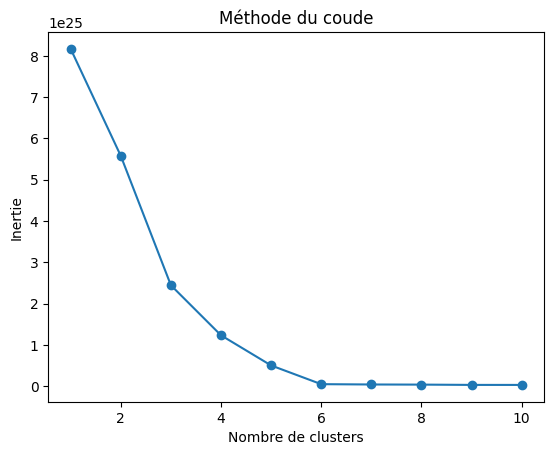

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialisez une liste pour stocker les valeurs d'inertie pour différents nombres de clusters
inertias = []

# Testez différentes valeurs de k (nombre de clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# Tracez le graphique de l'inertie en fonction du nombre de clusters
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


In [46]:
from sklearn.cluster import KMeans

# Initialiser K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=3)

# Ajuster le modèle aux données
kmeans.fit(X)

# Obtenir les étiquettes de cluster pour chaque point de données
labels = kmeans.labels_

# Obtenir les coordonnées des centres de cluster
cluster_centers = kmeans.cluster_centers_

ValueError: could not convert string to float: 'PAYMENT'